# <u> Spectral Clustering </u>

In spectral clustering, data points are treated as nodes of a graph. Thus, spectral clustering is a graph partitioning problem. The nodes are then mapped to a low-dimensional space that can be easily segregated to form clusters. No assumption is made about the shape/form of the clusters. The goal of spectral clustering is to cluster data that is connected but not necessarily compact or clustered within convex boundaries.

### <u> Spectral Clustering vs. Kmeans </u>

- <b><u> Compactness </u></b> — Points that lie close to each other fall in the same cluster and are compact around the cluster center. The closeness can be measured by the distance between the observations. E.g.: <b> K-Means Clustering </b>
- <b><u> Connectivity </u></b> — Points that are connected or immediately next to each other are put in the same cluster. Even if the distance between 2 points is less, if they are not connected, they are not clustered together. <b> Spectral Clustering </b> is a technique that follows this approach.

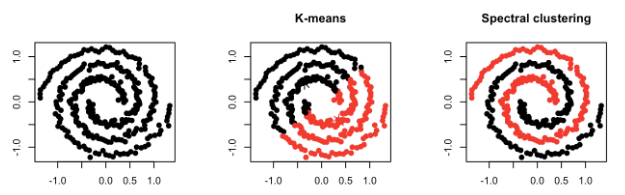

 Datasets where spectral clustering is applied for clustering:
 
 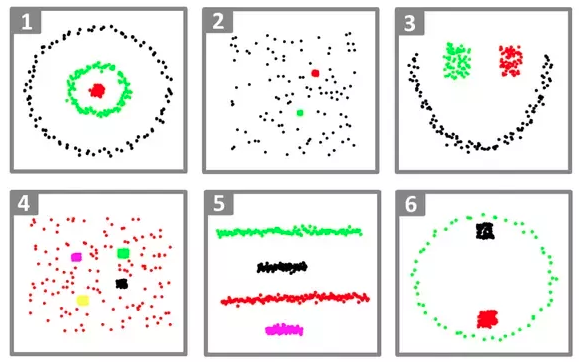
 
 K-means will fail to effectively cluster these, even when the true number of clusters K is known to the algorithm. K-means, as a <i> data-clustering </i> algorithm, ideal for discovering globular clusters where all members of each cluster are in close proximity to each other (in Euclidean sense).

Spectral clustering is more general (and powerful) because if we just use Eucledean Distance in it's similarity matrix, It will behave like k-means. The converse is not true though.

If we have 𝑃 data points each with 𝑁 dimensions/features, input matrix to K-means would be 𝑁 by 𝑃, while input matrix to spectral clustering would be 𝑃 by 𝑃. Spectral clustering is indifferent to the number of features we use (Gaussian kernel which can be thought of as an infinite-dimensional feature transformation is particularly popular when using spectral clustering). We will face difficulties applying spectral clustering (at least the vanilla version) to very large datasets (large 𝑃).

### <u> Algorithm: </u>
- Project data into $R^{n}$ matrix
- Define an Affinity  matrix A , using a Gaussian Kernel K  or an Adjacency matrix
- Construct the Graph Laplacian from A  (i.e. decide on a normalization)
- Solve the Eigenvalue problem
- Select k eigenvectors corresponding to the k lowest (or highest) eigenvalues to define a k-dimensional subspace 
- Form clusters in this subspace using k-means

#### <u> Affinity Matrix: </u>

We first create an undirected graph G = (V, E) with vertex set V = {v1, v2, …, vn} = 1, 2, …, n observations in the data.

- <b> <u> Epsilon-neighbourhood Graph: </u> </b> A parameter epsilon is fixed beforehand. Then each point is connected to all the points which lie in it’s epsilon-radius. If all the distances between any two points are similar in scale then typically the weights of the edges ie the distance between the two points are not stored since they do not provide any additional information. Thus, in this case, the graph built is an undirected and unweighted graph.
- <b> <u> K-Nearest Neighbours: </u> </b> A parameter k is fixed beforehand. Then, for two vertices u and v, an edge is directed from u to v only if v is among the k-nearest neighbours of u. Note that this leads to the formation of a weighted and directed graph because it is not always the case that for each u having v as one of the k-nearest neighbours, it will be the same case for v having u among its k-nearest neighbours. To make this graph undirected, one of the following approaches are followed:-
     - Direct an edge from u to v and from v to u if either v is among the k-nearest neighbours of u <b> OR </b> u is among the k-nearest neighbours of v.
     - Direct an edge from u to v and from v to u if v is among the k-nearest neighbours of u <b> AND </b> u is among the k-nearest neighbours of v.
     
- <b> <u> Fully-Connected Graph: </u></b> To build this graph, each point is connected with an undirected edge-weighted by the distance between the two points to every other point. Since this approach is used to model the local neighbourhood relationships thus typically the Gaussian similarity metric is used to calculate the distance.

$$S(x_i, x_j) = exp(-\frac{||x_i - x_j||^2}{2\sigma^2})$$

Thus, when we create an adjacency matrix for any of these graphs, Aij ~ 1 when the points are close and Aij → 0 if the points are far apart. 

Consider the following graph with nodes 1 to 4, weights (or similarity) wij and its adjacency matrix:

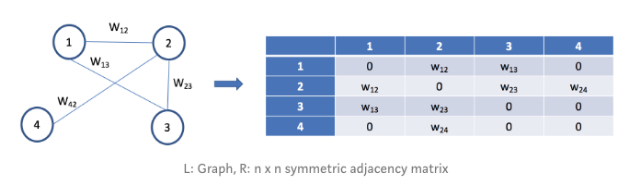

<b><u>Metric :</u></b>

 Affinity metric determines how close, or similar, two points our in our space. We will use a Gaussian Kernel and not the standard Euclidean metric.

Given 2 data points $x_{i},x_{j}$  (projected in $R^{n}$ ), we define an Affinity $A_{i,j}$  that is positive, symmetric, and depends on the Euclidian distance $\Vert x_{i}-x_{j}\Vert$  between the data points

$$A_{ij} = {e}^{-\alpha \Vert x_{i}-x_{j}\Vert^2 }$$

We might provide a hard cut off R , so that

$A_{ij} = 0$  if $\Vert x_{i}-x_{j}\Vert^2 \geq R$

$A_{i,j}\simeq 1$  when the points are close in $R^{n}$ , and $A_{i,j}\rightarrow 0$  if the points $x_{i}$, $x_{j}$ are far apart. Close data points are in the same cluster. Data points in different clusters are far away. But data points in the same cluster may also be far away–even farther away than points in different clusters. Our goal then is to transform the space so that when 2 points $x_{i}$, $x_{j}$ are close, they are always in same cluster, and when they are far apart, they are in different clusters. Generally we use the Gaussian Kernel K  directly, or we form the Graph Laplacian A.

<b><u>Graph Laplacian</u></b> is just another matrix representation of a graph. It can be computed as:

- Simple Laplacian $L=D-A$
- Normalized Laplacian $L_{N}=D^{-1/2}LD^{-1/2}$
- Generalized Laplacian $L_{G} = D^{-1}L$
- Relaxed Laplacian $L_{\rho} = L-\rho D $
- Ng, Jordan, & Weiss Laplacian $L_{NJW}=D^{-1/2}AD^{-1/2}, where A_{i,i}=0 $

$L = D - A$ where A is the Adjacency matrix and D is the Degree Matrix.

$$D_i = \sum_{j|(i,j) \in E} w_{ij}$$
$$ L_{ij} =
  \begin{cases}
    d_i           & \quad \text{if } i = j\\
    -w_{ij}       & \quad \text{if } i , j \in E \\
    0             & \quad \text{if } i , j \notin  E
  \end{cases}
$$

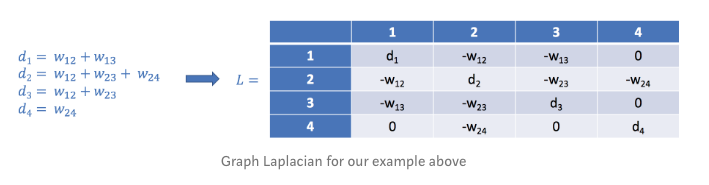

The whole purpose of computing the Graph Laplacian L was to find eigenvalues and eigenvectors for it, in order to embed the data points into a low-dimensional space.


<b><u>The Cluster Eigenspace Problem</u></b>

To identify good clusters, Laplacian L should be approximately a block-diagonal, with each block defining a cluster. If we have 3 major clusters (C1, C2, C3), we would expect

$$\begin{matrix}
  L_{1,1} & L_{1,2} & L_{1,3} \\
  L_{2,1} & L_{2,2} & L_{2,3} \\
  L_{3,1} & L_{3,2} & L_{3,3}
 \end{matrix}
 \sim
 \begin{matrix}
  L_{1,1} & 0 & 0 \\
  0 & L_{2,2} & 0 \\
  0 & 0 & L_{3,3}
 \end{matrix}$$
 
 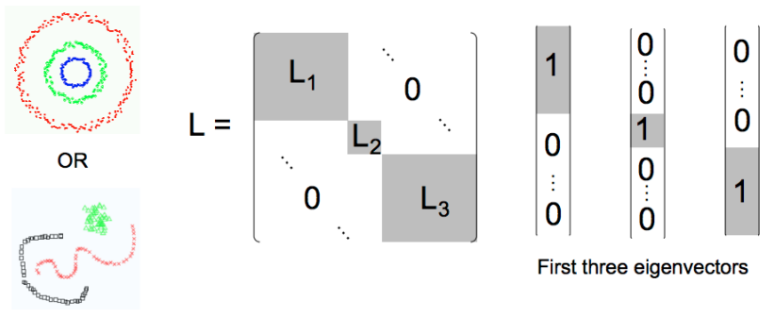
 
 We also expect that the 3 lowest eigenvalues  & eigenvectors (\lambda_{i},v_{i})  of L  each correspond to a different cluster.
 
 For K clusters, compute the first K eigen vectors. ${v_1, v_2, ...v_k}$. Stack the vectors vertically to form the matrix with eigen vecttors as columns. Represent every node as the corresponding row of this new matrix, these rows form the feature vector of the nodes. Use Kmeans to cluster these points into k clusters $C_1, C_2 ...C_k$
 
 
### <u> Example </u>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 

In [ ]:
raw_df = pd.read_csv('../input/ccdata/CC GENERAL.csv')
raw_df = raw_df.drop('CUST_ID', axis = 1) 
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head(2)

In [ ]:
# Preprocessing the data to make it visualizable 
  
# Scaling the Data 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(raw_df) 
  
# Normalizing the Data 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2) 

<u>Building the Clustering models and Visualizing the clustering</u>

Two different Spectral Clustering models with different values for the parameter ‘affinity’.

<b> <u> Affinity matrix with Gaussian Kernel  </u></b>

<b> "affinity" = "rbf" </b>

In [ ]:
# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf') 
  
# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

In [ ]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = SpectralClustering(n_clusters = 2, affinity ='rbf') .fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

<b> <u> Affinity matrix with Eucledean Distance  </u></b>

<b>affinity = ‘nearest_neighbors’ </b>

In [ ]:
# Building the clustering model 
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels_nn = spectral_model_nn.fit_predict(X_principal)

In [ ]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') .fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

<b> Performance Evaluation </b>

In [ ]:
# List of different values of affinity 
affinity = ['rbf', 'nearest-neighbours'] 
  
# List of Silhouette Scores 
s_scores = [] 
  
# Evaluating the performance 
s_scores.append(silhouette_score(raw_df, labels_rbf)) 
s_scores.append(silhouette_score(raw_df, labels_nn)) 
  
# Plotting a Bar Graph to compare the models 
plt.bar(affinity, s_scores) 
plt.xlabel('Affinity') 
plt.ylabel('Silhouette Score') 
plt.title('Comparison of different Clustering Models') 
plt.show() 

print(s_scores)